In [1]:
# keras - tensorflow
# check version
import tensorflow
print(tensorflow.__version__)

2.13.0


In [ ]:
# 1. Define the model : create the network topology
#    define the model
#    model = ...
# 2. Compile the model
   # compile the model
   # opt = SGD(learning_rate=0.01, momentum=0.9)   --- Gradient Descent (determines the LEARNING)... ADAM is the default
   # model.compile(optimizer=opt, loss='binary_crossentropy')
   # The three most common loss functions are:
   #  ‘binary_crossentropy‘ for binary classification - and activation function is sigmoid
   #  ‘sparse_categorical_crossentropy‘ for multi-class classification - and activation function is softmax
   #  ‘mse‘ (mean squared error) for regression
   # https://www.tensorflow.org/api_docs/python/tf/keras/losses
   # You're also going to want to see some metrics:
   # ...
   # compile the model
   # model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
   # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# 3. Train the model --- we use the fit function to train the model
   # pick things like number of epochs (# of times through the entire training dataset).  The batch size (number of samples in an epoch used to estimate the
   # error)
   # fit the model
   # model.fit(X, y, epochs=100, batch_size=32)
# 4. Evaluate the model
   # loss = model.evaluate(X, y, verbose=0)
# 5. Make predictions
   # yhat = model.predict(X)


# We are going to use the SEQUENTIAL API ... we can use for ANY regression... classification...
# example of a model defined with the sequential api
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
# define the model
# model = Sequential()
# model.add(Dense(10, input_shape=(8,)))
# model.add(Dense(1))

# Binary Classification Use Case for Deep Learning

In [ ]:
# https://raw.githubusercontent.com/fenago/datasets/main/ionosphere.csv
# data dictionary:  https://archive.ics.uci.edu/dataset/52/ionosphere

In [2]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
path = 'https://raw.githubusercontent.com/fenago/datasets/main/ionosphere.csv'
df= read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
# the data is already scaled but you want to make sure you scale the data and ENCODE the data
# in this case - we only need to encode the target.

In [8]:
# split into input and output columns - you can split the data however you like
X, y = df.values[:, :-1], df.values[:, -1]

In [9]:
# ensure all data are floating point values.  unique to this dataset only.  you want to make sure all are numeric and scaled
X = X.astype('float32')

In [10]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [11]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(235, 34) (116, 34) (235,) (116,)


In [ ]:
# up to here... this is EXACTLY the same as before...

In [15]:
X_train.shape

(235, 34)

In [14]:
# determine the number of input features
n_features = X_train.shape[1]

In [16]:
n_features

34

In [17]:
# Step 1: define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9957
Epoch 2/150
8/8 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9957
Epoch 3/150
8/8 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9957
Epoch 4/150
8/8 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9957
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9957
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9957
Epoch 7/150
8/8 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9957
Epoch 8/150
8/8 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9957
Epoch 9/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9957
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9957
Epoch 11/150
8/8 [===========

In [22]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.922


In [23]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 106ms/step
Predicted: 1.000


# Multiclass Classification

In [ ]:
# https://raw.githubusercontent.com/fenago/datasets/main/iris.csv

In [24]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
path = 'https://raw.githubusercontent.com/fenago/datasets/main/iris.csv'
df = read_csv(path)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [28]:
# determine the number of input features
n_features = X_train.shape[1]
n_features

4

In [29]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [32]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 3.0548 - accuracy: 0.2900
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 2.8717 - accuracy: 0.2900
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 2.6924 - accuracy: 0.2900
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 2.5189 - accuracy: 0.2900
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 2.3537 - accuracy: 0.2900
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 2.1995 - accuracy: 0.2900
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 2.0568 - accuracy: 0.2900
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 1.9246 - accuracy: 0.2900
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 1.8106 - accuracy: 0.2900
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 1.7047 - accuracy: 0.2900
Epoch 11/150
4/4 [=========

In [34]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.980


In [35]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

1/1 [==============================] - 0s 75ms/step
Predicted: [[0.8378267  0.12450971 0.03766355]] (class=0)


# Regression

In [36]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
path = 'https://raw.githubusercontent.com/fenago/datasets/main/housing.csv'
df = read_csv(path, header=None)

In [38]:
# Preprocess your data
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [39]:
# determine the number of input features
n_features = X_train.shape[1]

In [42]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))  # notice that there is NO activation function for regression.

In [43]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [45]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Epoch 1/150
11/11 [==============================] - 0s 2ms/step - loss: 48.3272
Epoch 2/150
11/11 [==============================] - 0s 2ms/step - loss: 46.7501
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 47.0162
Epoch 4/150
11/11 [==============================] - 0s 2ms/step - loss: 46.8306
Epoch 5/150
11/11 [==============================] - 0s 2ms/step - loss: 46.5969
Epoch 6/150
11/11 [==============================] - 0s 2ms/step - loss: 46.0522
Epoch 7/150
11/11 [==============================] - 0s 2ms/step - loss: 46.1359
Epoch 8/150
11/11 [==============================] - 0s 2ms/step - loss: 47.0130
Epoch 9/150
11/11 [==============================] - 0s 2ms/step - loss: 47.2165
Epoch 10/150
11/11 [==============================] - 0s 2ms/step - loss: 46.2377
Epoch 11/150
11/11 [==============================] - 0s 2ms/step - loss: 45.0635
Epoch 12/150
11/11 [==============================] - 0s 2ms/step - loss: 45.6740
Epoch 13/150
11/11 [=====

# Visualize the Model

In [46]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


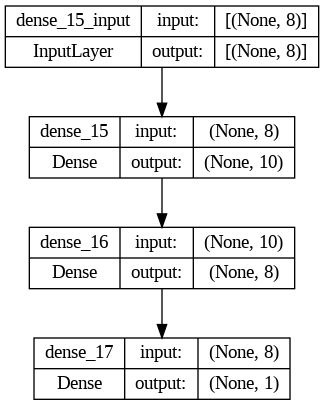

In [47]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

# Visualize Learning Curves

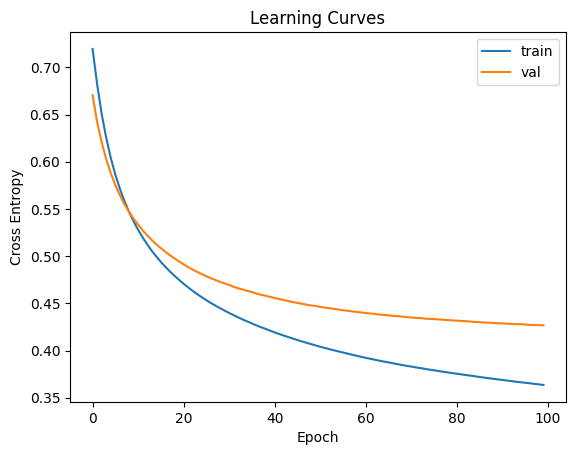

In [48]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# How to Save and Load Your Model

In [50]:
!pip install h5py

In [51]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# save model to file
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# load the model from file
model = load_model('model.h5')
# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

1/1 [==============================] - 0s 99ms/step
Predicted: 0.873
